In [2]:
#Importing Necesssary Libraries
import os
import pickle
import csv
from PIL import Image
import math
import matplotlib.pyplot as plt
import random
import cv2 as cv
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
import shutil as sh


print('All modules imported.')

All modules imported.


In [3]:
#Paths of the Dataset

train_path = './Train'
test_path = './Test'

In [4]:
#Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [5]:
#Class Labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
#Class Distribution function
path_folders = os.listdir(train_path)

def class_distribution(folders,train_path,classes):
    train_number = []
    class_num = []

    for folder in folders:
        train_files = os.listdir(train_path + '/' + folder)
        train_number.append(len(train_files))
        class_num.append(classes[int(folder)])

    # Sorting the dataset on the basis of number of images in each class
    zipped_lists = zip(train_number, class_num)
    sorted_pairs = sorted(zipped_lists)
    tuples = zip(*sorted_pairs)
    train_number, class_num = [ list(tuple) for tuple in  tuples]

    # Plotting the number of images in each class
    plt.figure(figsize=(21,10))  
    plt.bar(class_num, train_number)
    plt.xticks(class_num, rotation='vertical')
    plt.show()



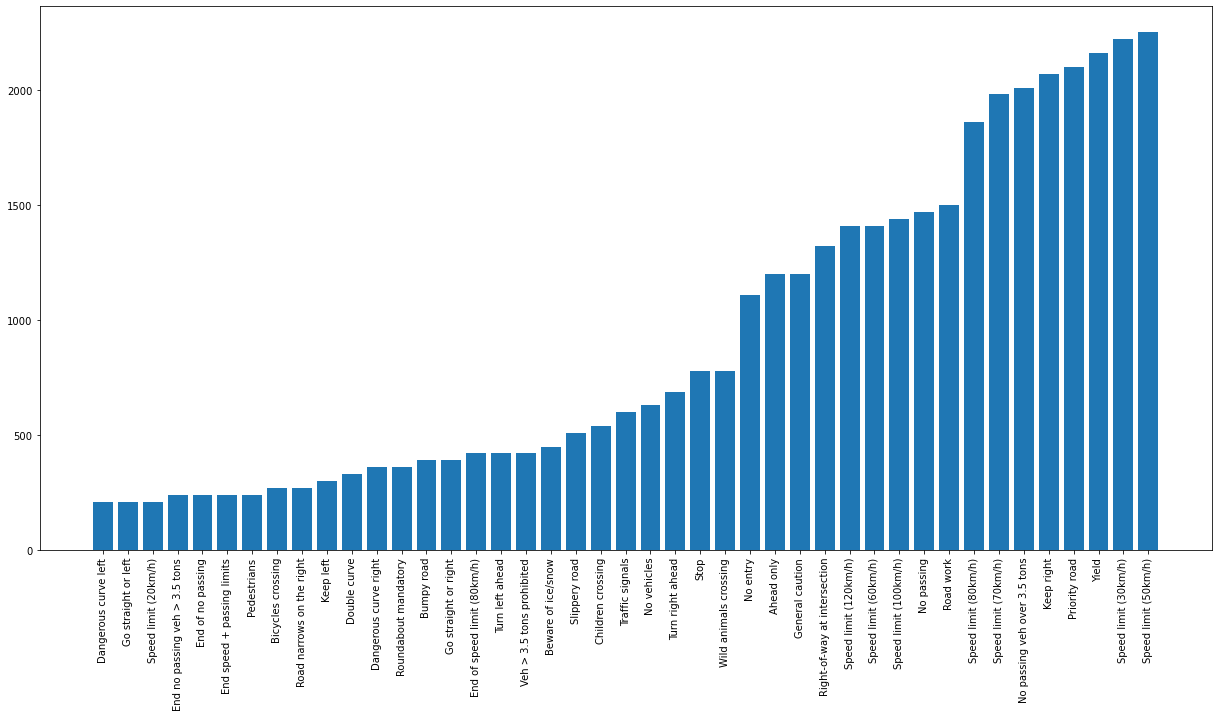

In [7]:
#Class Distributions
class_distribution(path_folders,train_path,classes)

In [8]:
#Loading Train Data from csv 
train_df = pd.read_csv("Train.csv")
train_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [66]:
#Check for missing values
train_df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [9]:
#Loading Test Data from csv 
test_df = pd.read_csv("Test.csv")
test_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [67]:
#Check for missing values
test_df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [10]:
#Masking Train Data for chosen 13 classes 
train_reduced_df = train_df[train_df.ClassId.isin([1,2,8,9,10,12,13,14,17,33,34,36,37])]
train_reduced_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
570,56,57,6,5,51,52,1,Train/1/00001_00000_00000.png
571,55,57,5,6,50,52,1,Train/1/00001_00000_00001.png
572,56,56,5,6,51,51,1,Train/1/00001_00000_00002.png
573,58,58,6,6,53,52,1,Train/1/00001_00000_00003.png
574,59,59,6,6,54,53,1,Train/1/00001_00000_00004.png
575,57,59,5,6,52,54,1,Train/1/00001_00000_00005.png
576,57,59,5,5,52,54,1,Train/1/00001_00000_00006.png
577,57,59,5,5,52,53,1,Train/1/00001_00000_00007.png
578,60,60,6,6,54,54,1,Train/1/00001_00000_00008.png
579,61,61,5,6,55,56,1,Train/1/00001_00000_00009.png


In [11]:
#Converting dataframe to csv and saving to path
train_reduced_df.to_csv("./Train_reduced.csv")


In [35]:
#Masking Test Data for chosen 13 classes 
test_reduced_df = test_df[test_df.ClassId.isin([1,2,8,9,10,12,13,14,17,33,34,36,37])]
test_reduced_df.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
1,42,45,5,5,36,40,1,Test/00001.png
3,27,29,5,5,22,24,33,Test/00003.png
7,32,33,5,5,26,28,12,Test/00007.png
10,38,37,6,5,33,32,12,Test/00010.png
15,27,27,6,6,22,22,9,Test/00015.png
21,52,55,5,6,47,49,33,Test/00021.png
22,116,120,10,11,106,110,9,Test/00022.png
24,59,65,5,6,54,60,1,Test/00024.png
26,56,49,5,6,51,43,13,Test/00026.png
27,28,29,5,6,23,24,10,Test/00027.png


In [36]:
#Converting dataframe to csv and saving to path
test_reduced_df.to_csv("./Test_reduced.csv")

In [ ]:
#Creating Directory
parent_dir = 'Train_reduced/'
for i in pd.unique(train_reduced_df.ClassId):
    directory = str(i)
    path = os.path.join(parent_dir,directory)
    os.makedirs(path)

In [25]:
#Reduced Train images 
import shutil
 
for i,j in zip(train_reduced_df.ClassId, train_reduced_df.Path):
    #print(i)
    shutil.copy2(j,'Train_reduced/{}/'.format(i))

In [56]:

#Creating Directory
parent_dir = 'Test_foldered_reduced/'
for i in pd.unique(test_reduced_df.ClassId):
    directory = str(i)
    path = os.path.join(parent_dir,directory)
    os.makedirs(path)
 


In [58]:
#Reduced Test images 

for i,j in zip(test_reduced_df.ClassId, test_reduced_df.Path):
    #print(i)
    shutil.copy2(j,'Test_foldered_reduced/{}/'.format(i))

In [68]:
#Foldering the Test Images according to Class ID
#Creating Directory
parent_dir = 'Test_foldered/'
for i in pd.unique(test_df.ClassId):
    directory = str(i)
    path = os.path.join(parent_dir,directory)
    os.makedirs(path)


#Saving them on directory    
for i,j in zip(test_df.ClassId, test_df.Path):
    #print(i)
    shutil.copy2(j,'Test_foldered/{}/'.format(i))

In [59]:
#Reduced Class Labels

classes_reduced ={
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            17:'No entry',
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            36:'Go straight or right', 
            37:'Go straight or left',
            }

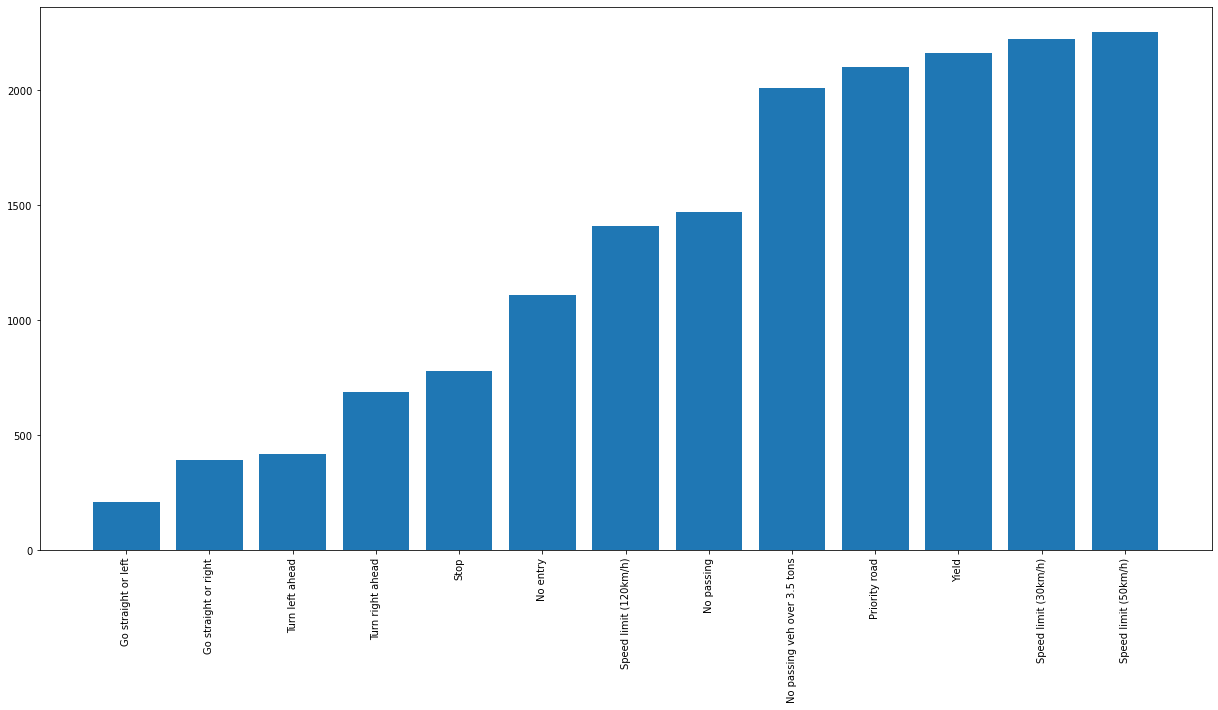

In [61]:
#Reduced Class Distributions
path = 'Train_reduced/'
path_folders = os.listdir(path)
class_distribution(path_folders,path,classes_reduced)